In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from google.colab import drive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
TweetData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP Assignment/Tweets.csv')

In [ ]:
TweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
TweetData.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data = TweetData[['airline_sentiment','text','negativereason','airline_sentiment_confidence']]

In [ ]:
data

,airline_sentiment,text,negativereason,airline_sentiment_confidence
0,neutral,@VirginAmerica What @dhepburn said.,NaN,1.0000
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,0.3486
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,0.6837
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",Bad Flight,1.0000
4,negative,@VirginAmerica and it's a really big bad thing about it,Can't Tell,1.0000
...,...,...,...,...
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.,NaN,0.3487
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,Customer Service Issue,1.0000
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,1.0000
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",Customer Service Issue,1.0000


In [ ]:
TweetData.shape

(14640, 15)

In [ ]:
TweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
TweetData['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


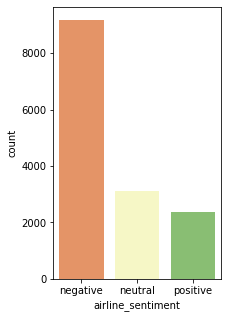

In [ ]:
plt.figure(figsize=(3,5))
sns.countplot(TweetData['airline_sentiment'], order =TweetData.airline_sentiment.value_counts().index,palette= 'RdYlGn')
plt.show()

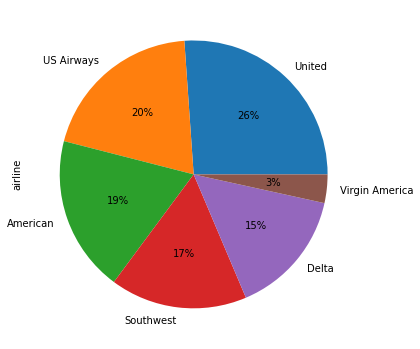

In [ ]:
plt.figure(figsize=(6,8))
TweetData.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Figure size 432x576 with 0 Axes>

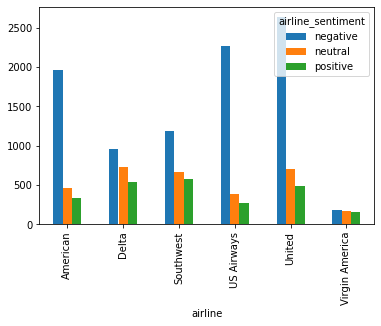

In [ ]:
plt.figure(figsize=(6,8))
airline_sentiment = TweetData.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

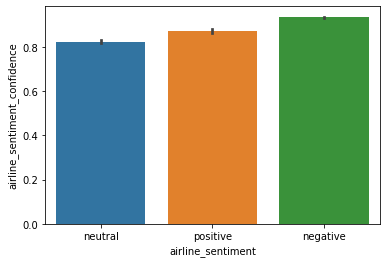

In [ ]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=TweetData)

In [ ]:
air_sentiment_Percentage =(pd.crosstab(TweetData.airline, TweetData.airline_sentiment)).apply(lambda a: a / a.sum() * 100, axis=1)
air_sentiment_Percentage

airline_sentiment,negative,neutral,positive
airline,,,
American,71.040232,16.781443,12.178325
Delta,42.979298,32.538254,24.482448
Southwest,49.008264,27.438017,23.553719
US Airways,77.686234,13.079300,9.234466
United,68.890633,18.236525,12.872841
Virgin America,35.912698,33.928571,30.158730


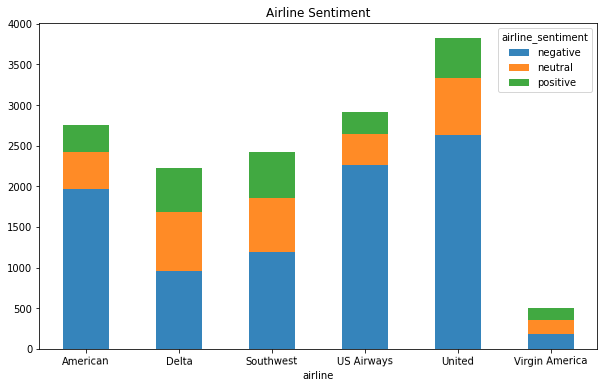

In [ ]:
pd.crosstab(index = TweetData["airline"],columns = TweetData["airline_sentiment"]).plot(kind='bar',
                figsize=(10, 6),alpha=0.9,rot=.8,stacked=True,title="Airline Sentiment")


In [ ]:
#counting the total number of negative reasons
TweetData.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight               847 
Lost Luggage                   724 
Bad Flight                     580 
Flight Booking Problems        529 
Flight Attendant Complaints    481 
longlines                      178 
Damaged Luggage                74  
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

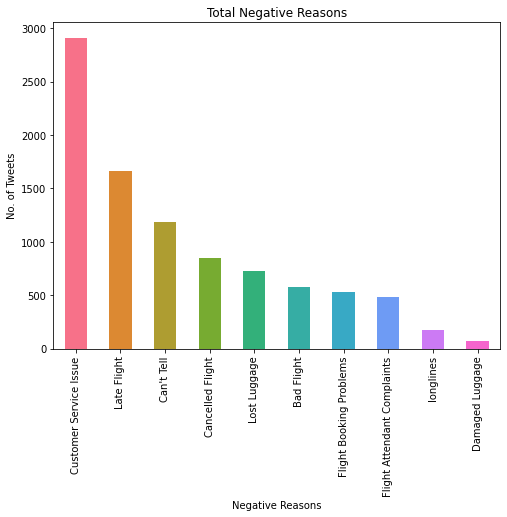

In [ ]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(TweetData["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [ ]:
TweetData = TweetData.reindex(np.random.permutation(TweetData.index))
TweetData = TweetData[['text', 'airline_sentiment']]

In [ ]:
TweetData.head()

,text,airline_sentiment
11063,"@USAirways http://t.co/AXRYeIWzh0, vuelo24.es, vuelos24.es sell too cheap MAD-NYC with USAirways. Are they trusted webs or is it a scam?",neutral
5380,@SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV,positive
1182,@united already done that. the answer i got was... oops we can give you miles and we're very sorry. but who pays for my discomfort for 9 h?,negative
5991,@SouthwestAir I got a phishing email claiming to be from Southwest. I can forward to you if you'd like to investigate.,neutral
13216,@AmericanAir @justynmoro I totally agree. You get the automatic phone attendent that goes NO WHERE and hangs up. Lousy service!,negative


In [ ]:
stop_words = list(stopwords.words('english'))

In [ ]:
def apply_preprocessing(sentence):
    sentence = sentence.lower()
    sentence = ''.join([c for c in sentence if c not in string.punctuation])
    text_tokens = word_tokenize(sentence)
    sentence_without_sw = ' '.join([word for word in text_tokens if not word in stopwords.words()])
    print('processing pre process')
    return sentence_without_sw


In [ ]:
TweetData['text'] = TweetData['text'].apply(apply_preprocessing)

Streaming output truncated to the last 5000 lines.
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
processing pre process
proces

In [ ]:
TweetData.head()
#     for text in sentence:
#         text = text.lower()
#         yield (text)

,text,airline_sentiment
11063,usairways httptcoaxryeiwzh0 vuelo24es vuelos24es sell cheap madnyc usairways trusted webs scam,neutral
5380,southwestair great trip past week vegas work southwest southwest httptcoa3ycflalxv,positive
1182,united already done answer got oops give miles sorry pays discomfort 9,negative
5991,southwestair got phishing email claiming southwest forward youd like investigate,neutral
13216,americanair justynmoro totally agree get automatic phone attendent goes hangs lousy service,negative


In [ ]:
# X = vectorizer.fit_transform(TweetData['text'])


In [ ]:
XTrain, XTest, YTrain, YTest = train_test_split(TweetData['text'], TweetData['airline_sentiment'], test_size=0.3, random_state=11)

In [ ]:
 # TweetData['text']= TweetData['text'].apply(remove_stopwords)

In [ ]:
# sentence =  ''.join([x for x in sentence.split() if x not in stop_words])
# [word for word in text_tokens if not word in stopwords.words()]

In [ ]:
#TweetData['airline_sentiment'] = TweetData['airline_sentiment'].apply(lambda x:''.join([i for i in x 
 #                                                 if i not in string.punctuation]))


In [ ]:


XTrain.describe()
XTrain

1989     united engineer designed 787 frame extend half foot plane seat 27a forced always                              
8985     usairways well miss gate agents rebooked boarding pass waiting landed time lunch amp beverage easy cheesy     
13645    americanair use aa credit platinum select world mastercard alaska flights american                            
7081     “ jetblue fleets fleek httptcovw2v8gvngq ” 😐😑                                                                 
9474     usairways get hold customer service ive called multiple times amp hold 30 mins hang                           
                                                ...                                                                    
5901     southwestair cant dm without following                                                                        
14051    americanair upset select seats tuesday flight online phone terrible customer service please help              
1896     united last week maintenance is

In [ ]:
XTest.describe()

count     4392              
unique    4331              
top       americanair thanks
freq      7                 
Name: text, dtype: object

In [ ]:
vectorizer = CountVectorizer(min_df=.001, max_df=.8, stop_words='english')

Xtrain_dtm = vectorizer.fit_transform(XTrain)
Xtest_dtm = vectorizer.transform(XTest)
#XTrainVect = vect.fit_transform(XTrain)
#XTestVect = vect.fit_transform(XTest)

In [ ]:
Xtrain_dtm.shape


(10248, 1148)

In [ ]:
Xtest_dtm.shape

(4392, 1148)

In [ ]:
print(Xtrain_dtm.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
LabelEnc = LabelEncoder()
YTrainLabelEnc = LabelEnc.fit_transform(YTrain)
YTestLabelEnc = LabelEnc.transform(YTest)

In [ ]:
YTrainLabelEnc

array([0, 2, 1, ..., 0, 0, 2])

In [ ]:
YTestLabelEnc

array([1, 0, 0, ..., 0, 2, 0])

In [ ]:
mnb_classifier = MultinomialNB()


In [ ]:
mnb_classifier.fit(Xtrain_dtm, YTrainLabelEnc)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
mnb_prediction = mnb_classifier.predict(Xtest_dtm)

In [ ]:
mnb_prediction

array([0, 0, 0, ..., 0, 2, 2])

In [ ]:
accuracy_score(YTestLabelEnc, mnb_prediction)

0.7486338797814208

In [ ]:
PosData = TweetData['text'][:4]
PosData.reset_index(drop=True, inplace=True)

In [ ]:
PosData

0    usairways httptcoaxryeiwzh0 vuelo24es vuelos24es sell cheap madnyc usairways trusted webs scam
1    southwestair great trip past week vegas work southwest southwest httptcoa3ycflalxv            
2    united already done answer got oops give miles sorry pays discomfort 9                        
3    southwestair got phishing email claiming southwest forward youd like investigate              
Name: text, dtype: object

In [ ]:
stop_words = set(stopwords.words('english')) 
for i in PosData:
  tokenized = sent_tokenize(i) 
  for i in tokenized: 
      
    # Word tokenizers is used to find the words  
    # and punctuation in a string 
    wordsList = nltk.word_tokenize(i) 
  
    # removing stop words from wordList 
    wordsList = [w for w in wordsList if not w in stop_words]  
  
    #  Using a Tagger. Which is part-of-speech  
    # tagger or POS-tagger.  
    tagged = nltk.pos_tag(wordsList) 
  
    print(tagged) 

[('usairways', 'NNS'), ('httptcoaxryeiwzh0', 'VBP'), ('vuelo24es', 'JJ'), ('vuelos24es', 'NN'), ('sell', 'NN'), ('cheap', 'JJ'), ('madnyc', 'NN'), ('usairways', 'NNS'), ('trusted', 'VBD'), ('webs', 'JJ'), ('scam', 'NN')]
[('southwestair', 'NN'), ('great', 'JJ'), ('trip', 'NN'), ('past', 'IN'), ('week', 'NN'), ('vegas', 'NN'), ('work', 'NN'), ('southwest', 'RB'), ('southwest', 'JJS'), ('httptcoa3ycflalxv', 'NN')]
[('united', 'JJ'), ('already', 'RB'), ('done', 'VBN'), ('answer', 'NN'), ('got', 'VBD'), ('oops', 'NNS'), ('give', 'VB'), ('miles', 'NNS'), ('sorry', 'VBP'), ('pays', 'VBZ'), ('discomfort', 'NN'), ('9', 'CD')]
[('southwestair', 'NN'), ('got', 'VBD'), ('phishing', 'VBG'), ('email', 'NN'), ('claiming', 'VBG'), ('southwest', 'JJS'), ('forward', 'RB'), ('youd', 'VBP'), ('like', 'IN'), ('investigate', 'NN')]


In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
about_interest_text = ("Ned's eldest son, Robb, gathered an army and rose up in rebellion against the Lannisters, trying to win the independence of his kingdom.")
about_interest_doc = nlp(about_interest_text)
displacy.render(about_interest_doc, style='dep', jupyter=True)